In [1]:
import numpy as np
import pandas as pd
#importing data from Lahman's dataset
players_batting=pd.read_csv('../Baseball_Data/Batting.csv')
#importing full names from some other place
players_names=pd.read_csv('../Baseball_Data/player_id.csv')

In [2]:
#looking only at 2016 data
players_batting=players_batting[players_batting['yearID']==2016]
#making index the player ID
players_batting=players_batting.set_index(players_batting['playerID'])
del players_batting.index.name
#Adding player names to the dataframe
names=pd.concat([players_names['lahman_id'],players_names['mlb_name']], axis=1)
names=names.set_index(names['lahman_id'])
players_batting=players_batting.join(names, how='left')
#removing the data we dont care about
remove=['playerID', 'yearID', 'stint', 'lahman_id']
for i in remove:
        players_batting.drop(i, axis=1, inplace=True)
players_batting=players_batting[players_batting['AB']>50]

In [3]:
player_stats=players_batting
#Adds plate appearances
for i in range(len(player_stats)):
    player_stats.ix[i,'PA']=(player_stats.ix[i,'AB']+player_stats.ix[i,'BB']+player_stats.ix[i,'IBB']+player_stats.ix[i,'SH']
          +player_stats.ix[i,'SF'])
#Normalizing some of the data by plate appearances
columns_to_be_scaled=['R', 'H', '2B', '3B', 'HR', 'RBI','SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']
for i in range(len(player_stats)):
    for j in columns_to_be_scaled:
        player_stats.ix[i,j]=player_stats.ix[i,j]/player_stats.ix[i,'PA']
    
remove=['teamID', 'lgID', 'G', 'mlb_name', 'AB', 'PA']
for i in remove:
    player_stats.drop(i, axis=1, inplace=True)

In [4]:
player_stats

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
abreujo02,0.097525,0.266376,0.046579,0.001456,0.036390,0.145560,0.000000,0.002911,0.068413,0.181951,0.010189,0.021834,0.000000,0.013100,0.030568
ackledu01,0.085714,0.128571,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.114286,0.128571,0.000000,0.000000,0.000000,0.014286,0.000000
adamecr01,0.099206,0.194444,0.027778,0.011905,0.007937,0.067460,0.007937,0.011905,0.095238,0.186508,0.000000,0.015873,0.011905,0.000000,0.019841
adamsma01,0.113497,0.226994,0.055215,0.000000,0.049080,0.165644,0.000000,0.003067,0.076687,0.248466,0.003067,0.006135,0.000000,0.009202,0.015337
adriaeh01,0.043478,0.231884,0.028986,0.000000,0.028986,0.101449,0.000000,0.014493,0.028986,0.188406,0.000000,0.028986,0.057971,0.000000,0.000000
ahmedni01,0.084691,0.201954,0.029316,0.003257,0.013029,0.065147,0.016287,0.006515,0.048860,0.188925,0.009772,0.013029,0.006515,0.009772,0.029316
alberha01,0.034483,0.137931,0.017241,0.000000,0.000000,0.086207,0.017241,0.000000,0.000000,0.293103,0.000000,0.000000,0.034483,0.000000,0.017241
almonab01,0.123711,0.247423,0.103093,0.005155,0.005155,0.113402,0.041237,0.000000,0.041237,0.216495,0.005155,0.005155,0.000000,0.015464,0.025773
almoral01,0.119658,0.264957,0.076923,0.008547,0.025641,0.119658,0.000000,0.000000,0.042735,0.170940,0.000000,0.000000,0.000000,0.000000,0.042735
alonsyo01,0.097744,0.229323,0.063910,0.000000,0.013158,0.105263,0.005639,0.001880,0.084586,0.139098,0.001880,0.001880,0.000000,0.007519,0.028195


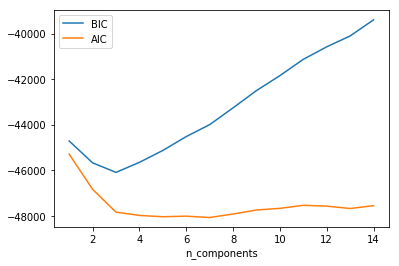

In [23]:
import matplotlib.pyplot as plt
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(player_stats)
          for n in n_components]
plt.plot(n_components, [m.bic(player_stats) for m in models], label='BIC')
plt.plot(n_components, [m.aic(player_stats) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()


In [29]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(player_stats)
labels = gmm.predict(player_stats)
probs = gmm.predict_proba(player_stats)
print(probs.round(3))
class_prob=pd.DataFrame(probs.round(3))


[[ 0.999  0.     0.   ]
 [ 0.     0.     1.   ]
 [ 0.     1.     0.   ]
 ..., 
 [ 0.993  0.007  0.   ]
 [ 0.986  0.014  0.   ]
 [ 1.     0.     0.   ]]
